# <u>BRITISH AIRWAYS PROJECT</u>  
## OBJECTIVE:
Develop a Classification Model To Predict Customers Who Successfully Book Flights From Those Who Cancel.

### IMPORTING PACKAGES

In [1]:
#For Data Manipulation
import pandas as pd
import numpy as np

#For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Predictive Modelling
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, average_precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier

### EXPLORATORY DATA ANALYSIS

In [2]:
#Importing Dataset
df0 = pd.read_excel(r"C:\Users\DELL\OneDrive\Documents\Terminus\Portfolio\06. British Airways Project\customer_booking.xlsx")

#EDA
#Primary EDA
print("DATA EXPLORATION \nDataset Shape: {} \nDataset Size: {} \n\nDATA SUMMARY".
      format(df0.shape, df0.size))
df0.info()

#Generating count pre and post drop of missing values 
print('\nPre-Drop Count Of Missing Values\n{}'.
      format(df0.isna().sum()))

df0.dropna(inplace=True, axis=0)

print('\nPost-Drop Count Of Missing Values\n{}'.
      format(df0.isna().sum()))

#Generating preview of dataset
print('\nDATASET PREVIEW')
df0.head(5)

DATA EXPLORATION 
Dataset Shape: (50000, 14) 
Dataset Size: 700000 

DATA SUMMARY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       5

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
#Droping columns
df = df0.drop(columns=['sales_channel','trip_type','flight_day', 'route','booking_origin'])

#EDA
print("DATA EXPLORATION \nDataset Shape: {} \nDataset Size: {} \n\nDATA SUMMARY".
      format(df0.shape, df0.size))

df.info()

df.head()

DATA EXPLORATION 
Dataset Shape: (50000, 14) 
Dataset Size: 700000 

DATA SUMMARY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   purchase_lead          50000 non-null  int64  
 2   length_of_stay         50000 non-null  int64  
 3   flight_hour            50000 non-null  int64  
 4   wants_extra_baggage    50000 non-null  int64  
 5   wants_preferred_seat   50000 non-null  int64  
 6   wants_in_flight_meals  50000 non-null  int64  
 7   flight_duration        50000 non-null  float64
 8   booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 3.4 MB


,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,1,0,0,5.52,0
1,1,112,20,3,0,0,0,5.52,0
2,2,243,22,17,1,1,0,5.52,0
3,1,96,31,4,0,0,1,5.52,0
4,2,68,22,15,1,0,1,5.52,0


### DATA VISUALIZATION

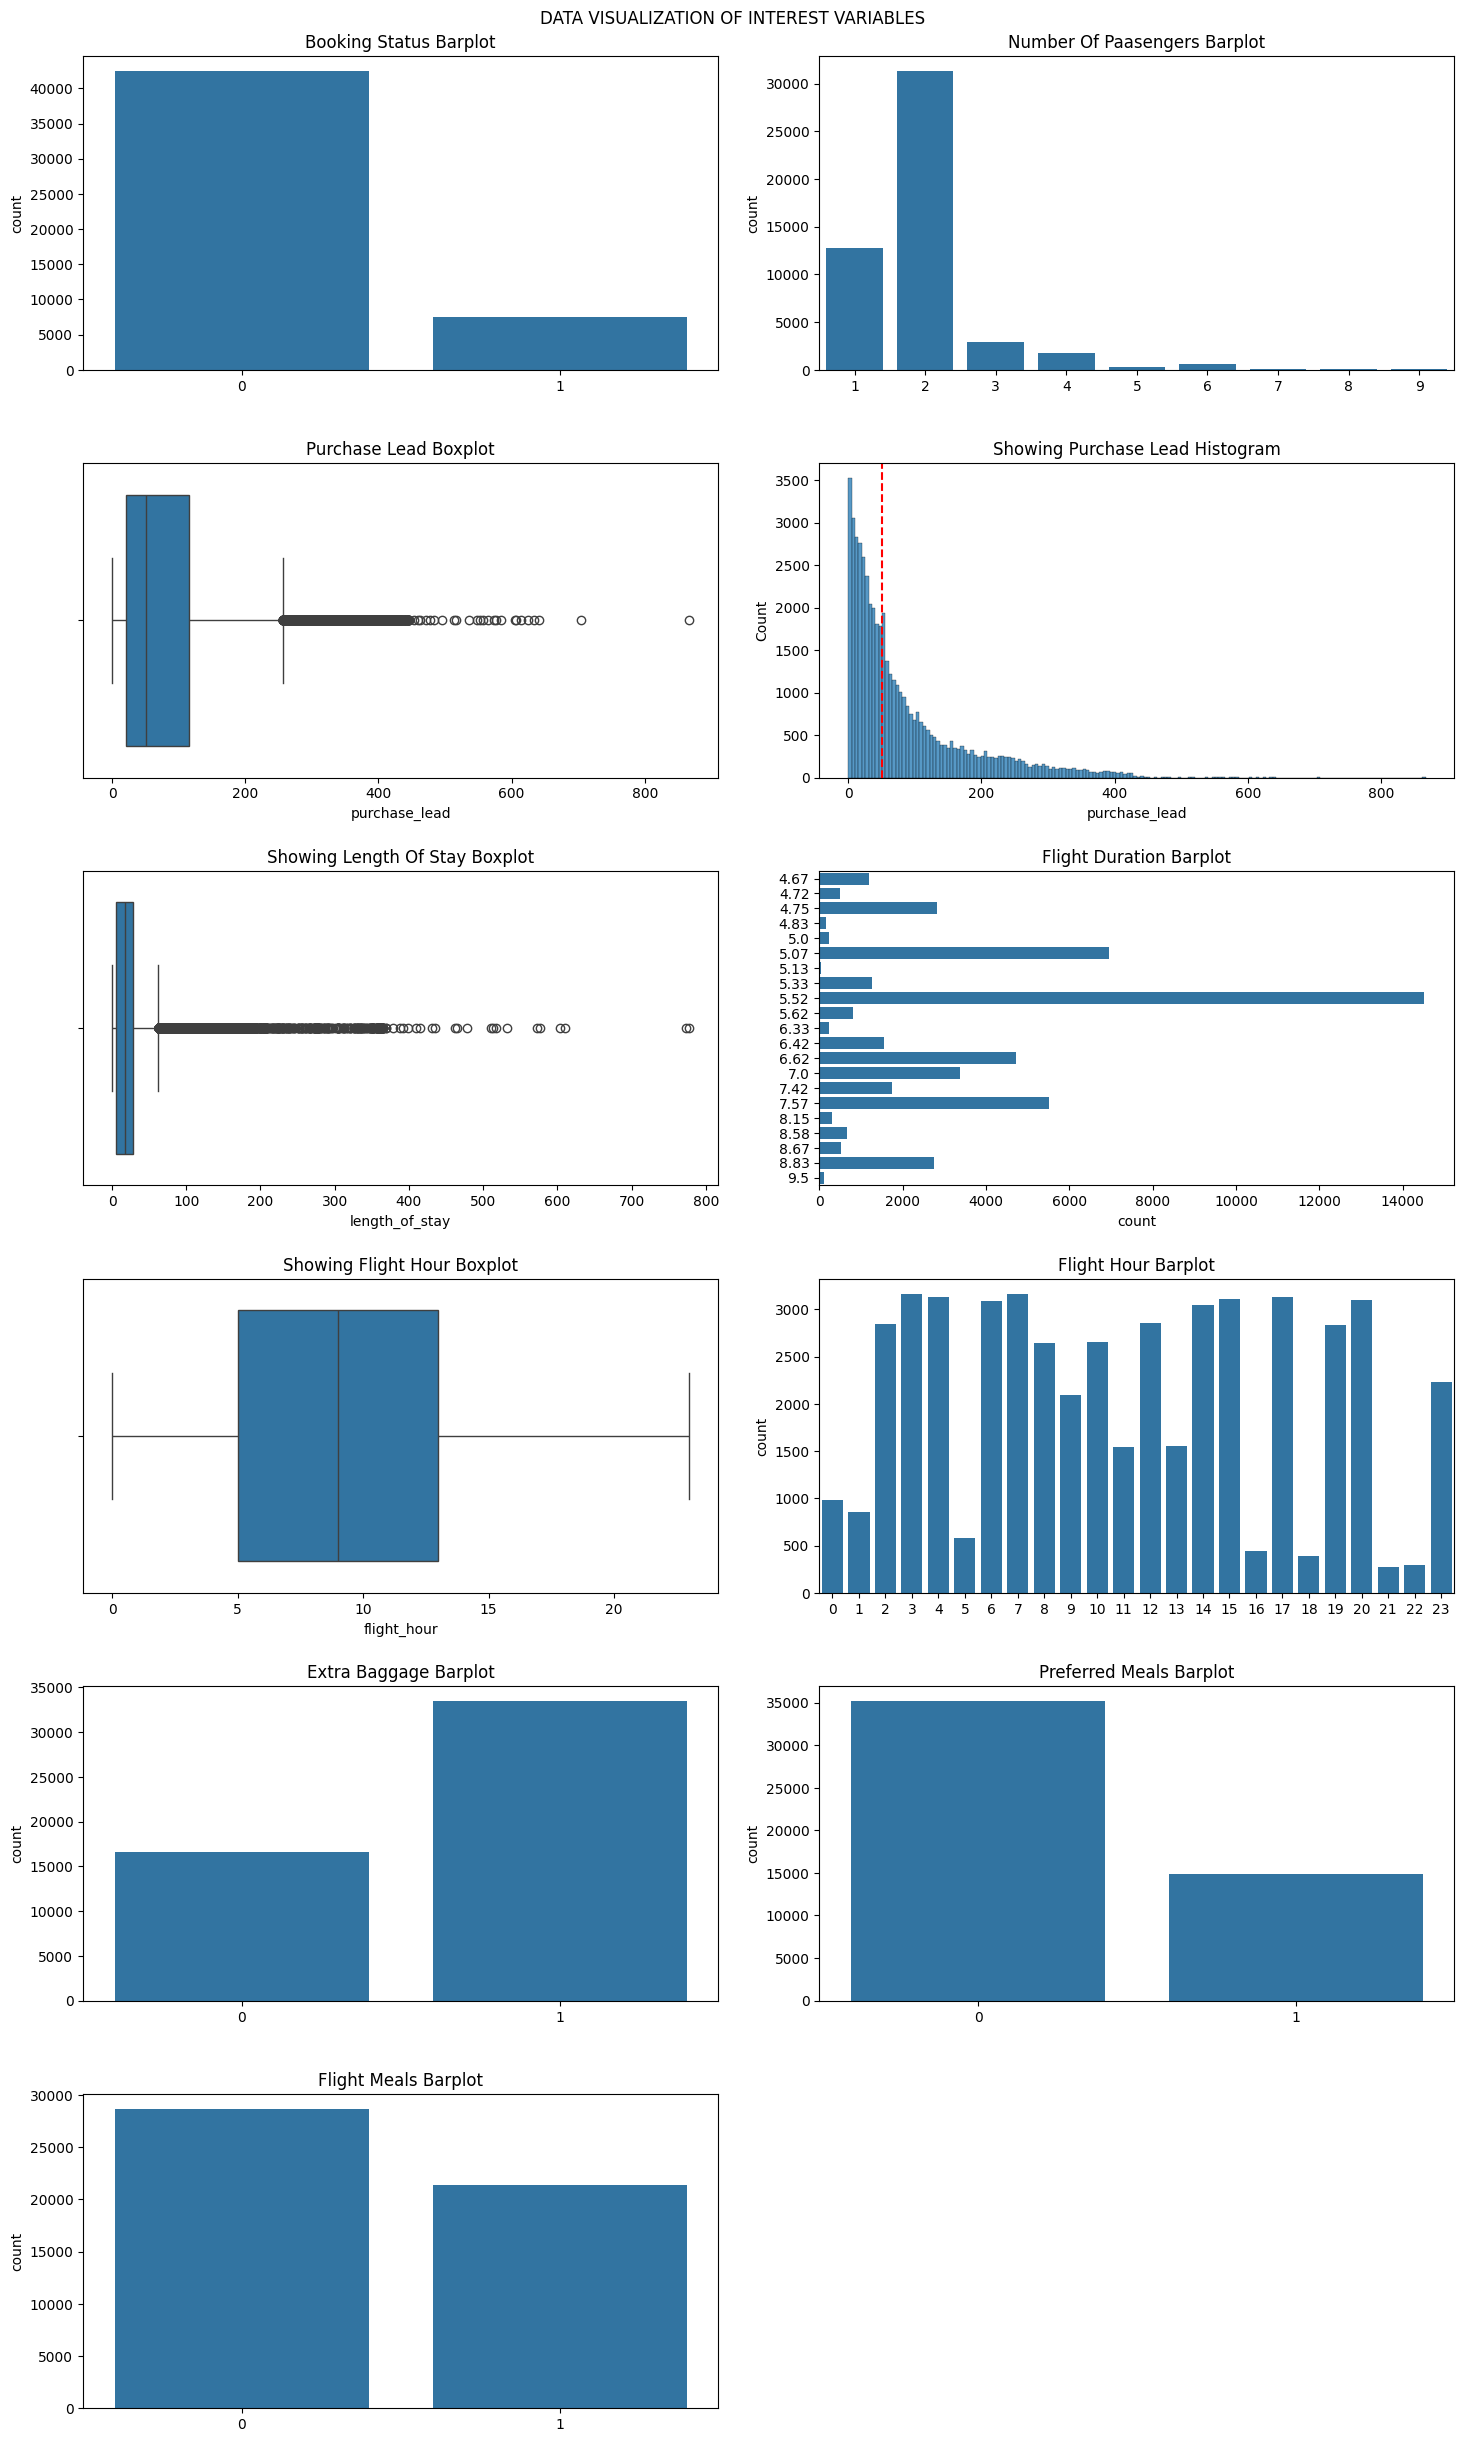

In [4]:
#Generating subplots
fig, ax = plt.subplots(6,2,figsize=(15,25))
plt.suptitle("DATA VISUALIZATION OF INTEREST VARIABLES")

#Generating vusializations
sns.barplot(x=df["booking_complete"].unique(),y=df["booking_complete"].value_counts() ,ax=ax[0,0])
sns.barplot(x=df["num_passengers"].unique(), y=df["num_passengers"].value_counts(), ax=ax[0,1])
sns.boxplot(x=df["purchase_lead"], ax=ax[1,0]) 
sns.histplot(x=df["purchase_lead"], ax=ax[1,1]) 
sns.boxplot(x=df["length_of_stay"], ax=ax[2,0])
sns.barplot(y=df["flight_duration"].unique(), x=df["flight_duration"].value_counts(), orient='h',ax=ax[2,1])
sns.boxplot(x=df["flight_hour"], ax=ax[3,0]) 
sns.barplot(x=df["flight_hour"].unique(), y=df["flight_hour"].value_counts(), ax=ax[3,1])
sns.barplot(x=df["wants_extra_baggage"].unique(), y=df["wants_extra_baggage"].value_counts(), ax=ax[4,0]) 
sns.barplot(x=df["wants_preferred_seat"].unique(), y=df["wants_preferred_seat"].value_counts(), ax=ax[4,1])
sns.barplot(x=df["wants_in_flight_meals"].unique(), y=df["wants_in_flight_meals"].value_counts(), ax=ax[5,0]) 
ax[5,1].axis('off')

#Labeling median values in histgram visualizations
ax[1,1].axvline(df["purchase_lead"].median(), color='red', linestyle='--')

#Labeling visualizations
ax[0,0].set_title("Booking Status Barplot")
ax[0,1].set_title("Number Of Paasengers Barplot")
ax[1,0].set_title("Purchase Lead Boxplot")
ax[1,1].set_title("Showing Purchase Lead Histogram")
ax[2,0].set_title("Showing Length Of Stay Boxplot")
ax[2,1].set_title("Flight Duration Barplot")
ax[3,0].set_title("Showing Flight Hour Boxplot")
ax[3,1].set_title("Flight Hour Barplot")
ax[4,0].set_title("Extra Baggage Barplot")
ax[4,1].set_title("Preferred Meals Barplot")
ax[5,0].set_title("Flight Meals Barplot")
plt.tight_layout(pad=2)

### TRAINING, VALIDATION AND TESTING DATASETS

In [5]:
#Checking class balance in booking complete
df.booking_complete.value_counts(normalize=True)

booking_complete
0    0.85044
1    0.14956
Name: proportion, dtype: float64

In [6]:
#Seperating dataset into X and y labels
y = df.booking_complete
X = df.drop('booking_complete', axis=1)

#Defining training and testing datasets
X_train0, X_test, y_train0, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)

#Defining training and validation datasets
X_train1, X_val, y_train1, y_val = train_test_split(X_train0, y_train0, stratify=y_train0, test_size=0.50, random_state=42)

#Generating dataframe for split
split2 = pd.DataFrame(data={"Dimensions":[X_train1.shape, X_test.shape,X_val.shape, y_val.size, y_train1.size, y_test.size]}, 
                      index=["X Train", "X Test", "X Val", "Y Val", "Y Train", "Y Test"])

#Previewing split
split2

,Dimensions
X Train,"(20000, 8)"
X Test,"(10000, 8)"
X Val,"(20000, 8)"
Y Val,20000
Y Train,20000
Y Test,10000


### BALANCING CLASSES IN TRAINING DATA

In [7]:
#Checking class balance in y train
y_train1.value_counts(normalize=True)

booking_complete
0    0.85045
1    0.14955
Name: proportion, dtype: float64

In [8]:
#Applying smote
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train1, y_train1)
y_train.value_counts()

booking_complete
0    17009
1    17009
Name: count, dtype: int64

### CLASSIFICATION MODELS

In [9]:
# Initialize empty lists to store results
Model = []
Accuracy = []
Precision = []
F1 = []
Recall = []
ROC_AUC = []

In [10]:
#Generating function to process results
def resultify (name:str, test, pred):
    # pred = predictions, test = test data, name = result name
    #Generating evaluation score
    accuracy_value = round(accuracy_score(test, pred) * 100, 0)
    precision_value = round(precision_score(test, pred) * 100, 0)
    recall_value = round(recall_score(test, pred) * 100, 0)
    f1_value = round(f1_score(test, pred) * 100, 0)
    roc_auc_value = round(roc_auc_score(test, pred) * 100, 0)
    
    # Append values to lists
    Model.append(name)
    Accuracy.append(f"{accuracy_value}%")
    Precision.append(f"{precision_value}%")
    Recall.append(f"{recall_value}%")
    F1.append(f"{f1_value}%")
    ROC_AUC.append(f"{roc_auc_value}%")

In [11]:
# Create DataFrame from results
def results():
    results = pd.DataFrame(
        data={'Accuracy' : Accuracy,
              'Precision': Precision,
              'Recall': Recall,
              'F1': F1,
              'ROC AUC': ROC_AUC},
        index = Model)
    return results

### INITIALIZING BASE CLASSIFIERS 

In [12]:
#Initializing first base classifier
rfc = RandomForestClassifier(random_state=42).fit(X_train, y_train)

#Initializing second base classifier
gbc = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)

#Initializing third base classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42).fit(X_train, y_train)

print("BASE CLASSIFIERS READY")

BASE CLASSIFIERS READY


### INITIALIZING VOTING CLASSIFIERS

In [13]:

#Initializing first meta classifiers
soft = VotingClassifier(estimators=[("RFC", rfc), ("GBC", gbc), ("XGB", xgb)], voting='soft').fit(X_train, y_train)

#Initializing second meta classifiers
hard = VotingClassifier(estimators=[("RFC", rfc), ("GBC", gbc), ("XGB", xgb)], voting='hard').fit(X_train, y_train)

print('VOTING CLASSIFIERS READY')

VOTING CLASSIFIERS READY


### VALIDATION PREDICTIONS

In [14]:
#Generating predictions
rfc_val_pred = rfc.predict(X_val)
resultify("RANDOM FOREST Val", y_val, rfc_val_pred) #Applying resultify

#Generating predictions
gbc_val_pred = gbc.predict(X_val)
resultify("GRADIENT BOOSTING Val", y_val, gbc_val_pred) #Applying resultify

#Generating predictions
xgb_val_pred = xgb.predict(X_val)
resultify("X GRADIENT BOOSTING Val", y_val, xgb_val_pred) #Applying resultify

#Generating predictions
soft_val_pred = soft.predict(X_val)
resultify("SOFT VOTING CLASSIFIER Val", y_val, soft_val_pred) #Applying resultify

#Generating predictions
hard_val_pred = hard.predict(X_val)
resultify("HARD VOTING CLASSIFIER Val", y_val, hard_val_pred) #Applying resultify

### TEST PREDICTIONS

In [15]:
#Generating predictions
rfc_test_pred = rfc.predict(X_test)
resultify("RANDOM FOREST Test", y_test, rfc_test_pred) #Applying resultify

#Generating predictions
gbc_test_pred = gbc.predict(X_test)
resultify("GRADIENT BOOSTING Test", y_test, gbc_test_pred) #Applying resultify

#Generating predictions
xgb_test_pred = xgb.predict(X_test)
resultify("X GRADIENT BOOSTING Test", y_test, xgb_test_pred) #Applying resultify

#Generating predictions
soft_test_pred = soft.predict(X_test)
resultify("SOFT VOTING CLASSIFIER Test", y_test, soft_test_pred) #Applying resultify

#Generating predictions
hard_test_pred = hard.predict(X_test)
resultify("HARD VOTING CLASSIFIER Test", y_test, hard_test_pred) #Applying resultify

### MODELS' RESULTS

In [16]:
#Displaying results
results()

,Accuracy,Precision,Recall,F1,ROC AUC
RANDOM FOREST Val,77.0%,22.0%,21.0%,22.0%,54.0%
GRADIENT BOOSTING Val,79.0%,25.0%,20.0%,22.0%,55.0%
X GRADIENT BOOSTING Val,80.0%,26.0%,16.0%,20.0%,54.0%
SOFT VOTING CLASSIFIER Val,81.0%,27.0%,16.0%,20.0%,54.0%
HARD VOTING CLASSIFIER Val,81.0%,27.0%,16.0%,20.0%,54.0%
RANDOM FOREST Test,77.0%,22.0%,20.0%,21.0%,54.0%
GRADIENT BOOSTING Test,78.0%,23.0%,19.0%,21.0%,54.0%
X GRADIENT BOOSTING Test,80.0%,24.0%,15.0%,19.0%,53.0%
SOFT VOTING CLASSIFIER Test,80.0%,23.0%,14.0%,17.0%,53.0%
HARD VOTING CLASSIFIER Test,80.0%,23.0%,14.0%,17.0%,53.0%


### CONFUSION MATRIX

In [17]:
#Defining validation confusion matricies 
rfc_val_cm = confusion_matrix(y_val, rfc_val_pred, normalize="all")*100
gbc_val_cm = confusion_matrix(y_val, gbc_val_pred, normalize="all")*100
xgb_val_cm = confusion_matrix(y_val, xgb_val_pred, normalize="all")*100

#Defining test confusion matricies 
rfc_test_cm = confusion_matrix(y_test, rfc_test_pred, normalize="all")*100
gbc_test_cm = confusion_matrix(y_test, gbc_test_pred, normalize="all")*100
xgb_test_cm = confusion_matrix(y_test, xgb_test_pred, normalize="all")*100

#Defining voting classifier confusion matricies 
soft_val_cm = confusion_matrix(y_val, soft_val_pred, normalize="all")*100
hard_val_cm = confusion_matrix(y_val, hard_val_pred, normalize="all")*100
soft_test_cm = confusion_matrix(y_test, soft_test_pred, normalize="all")*100
hard_test_cm = confusion_matrix(y_test, hard_test_pred, normalize="all")*100

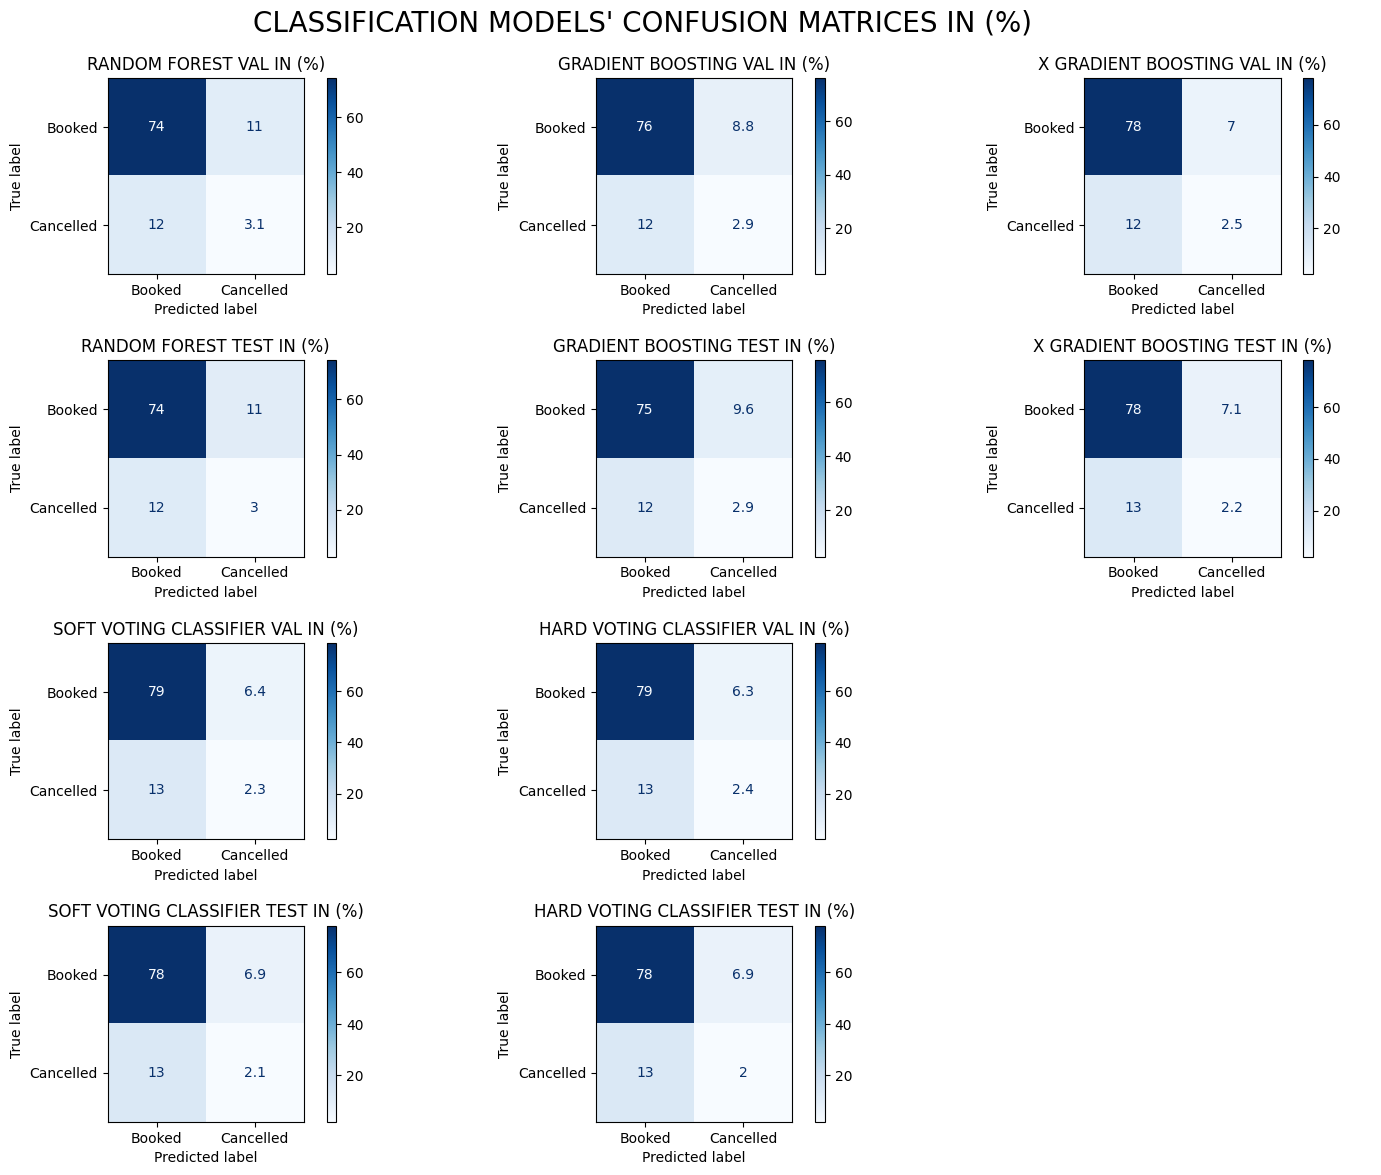

In [18]:
#Generating subplots
fig, ax = plt.subplots(4,3, figsize=(15,12))
plt.suptitle("CLASSIFICATION MODELS' CONFUSION MATRICES IN (%)", fontsize=20)
ConfusionMatrixDisplay(confusion_matrix=rfc_val_cm, display_labels=['Booked', 'Cancelled']).plot(cmap='Blues', ax=ax[0,0])
ConfusionMatrixDisplay(confusion_matrix=gbc_val_cm, display_labels=['Booked', 'Cancelled']).plot(cmap='Blues', ax=ax[0,1])
ConfusionMatrixDisplay(confusion_matrix=xgb_val_cm, display_labels=['Booked', 'Cancelled']).plot(cmap='Blues', ax=ax[0,2])
ConfusionMatrixDisplay(confusion_matrix=rfc_test_cm, display_labels=['Booked', 'Cancelled']).plot(cmap='Blues', ax=ax[1,0])
ConfusionMatrixDisplay(confusion_matrix=gbc_test_cm, display_labels=['Booked', 'Cancelled']).plot(cmap='Blues', ax=ax[1,1])
ConfusionMatrixDisplay(confusion_matrix=xgb_test_cm, display_labels=['Booked', 'Cancelled']).plot(cmap='Blues', ax=ax[1,2])
ConfusionMatrixDisplay(confusion_matrix=soft_val_cm, display_labels=['Booked', 'Cancelled']).plot(cmap='Blues', ax=ax[2,0])
ConfusionMatrixDisplay(confusion_matrix=hard_val_cm, display_labels=['Booked', 'Cancelled']).plot(cmap='Blues', ax=ax[2,1])
ConfusionMatrixDisplay(confusion_matrix=soft_test_cm, display_labels=['Booked', 'Cancelled']).plot(cmap='Blues', ax=ax[3,0])
ConfusionMatrixDisplay(confusion_matrix=hard_test_cm, display_labels=['Booked', 'Cancelled']).plot(cmap='Blues', ax=ax[3,1])
#Disabling unused axis
ax[2,2].axis('off')
ax[3,2].axis('off')

#Labelling subplots
ax[0,0].set_title("RANDOM FOREST VAL IN (%)")
ax[0,1].set_title("GRADIENT BOOSTING VAL IN (%)")
ax[0,2].set_title("X GRADIENT BOOSTING VAL IN (%)")
ax[1,0].set_title("RANDOM FOREST TEST IN (%)")
ax[1,1].set_title("GRADIENT BOOSTING TEST IN (%)")
ax[1,2].set_title("X GRADIENT BOOSTING TEST IN (%)")
ax[2,0].set_title("SOFT VOTING CLASSIFIER VAL IN (%)")
ax[2,1].set_title("HARD VOTING CLASSIFIER VAL IN (%)")
ax[3,0].set_title("SOFT VOTING CLASSIFIER TEST IN (%)")
ax[3,1].set_title("HARD VOTING CLASSIFIER TEST IN (%)")
plt.tight_layout(pad=1.5)

In [19]:
#Generating rfc feature importances
rfc_importances = rfc.feature_importances_
rfc_indices = np.argsort(rfc_importances)[::-1]

#Generating dataframe for feature importances
rfc_df = pd.DataFrame(
    data={'Feature': [X.columns[i] for i in rfc_indices],
          'Importance': rfc_importances[rfc_indices]})

#Generating gbc feature importances
gbc_importances = gbc.feature_importances_
gbc_indices = np.argsort(gbc_importances)[::-1]

#Generating dataframe for feature importances
gbc_df = pd.DataFrame(
    data={'Feature': [X.columns[i] for i in gbc_indices],
          'Importance': gbc_importances[gbc_indices]})

#Generating xgb feature importances
xgb_importances = xgb.feature_importances_
xgb_indices = np.argsort(xgb_importances)[::-1]

#Generating dataframe for feature importances
xgb_df = pd.DataFrame(
    data={'Feature': [X.columns[i] for i in xgb_indices],
          'Importance': xgb_importances[xgb_indices]})

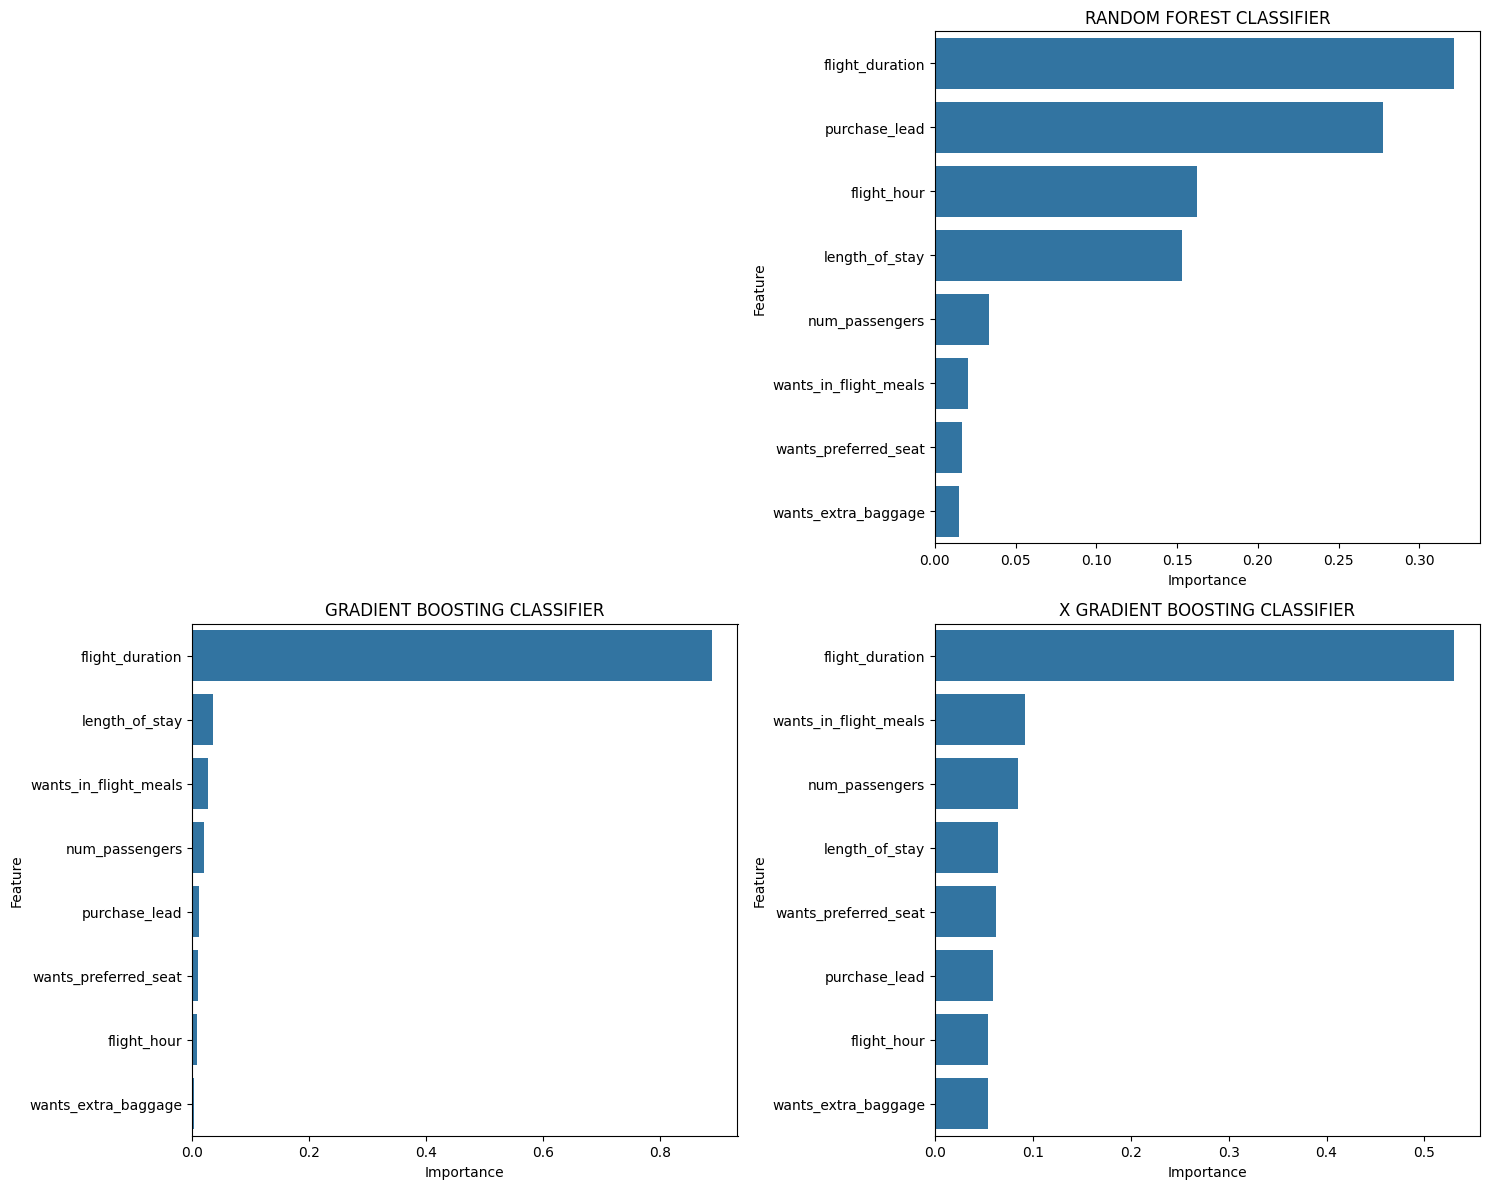

In [20]:
#Generating subplots
fig, ax = plt.subplots(2,2, figsize=(15,12))
ax[0,0].axis('off')
sns.barplot(data=rfc_df, y='Feature', x='Importance', ax=ax[0,1]) #orient='h'
sns.barplot(data=gbc_df, y='Feature', x='Importance', ax=ax[1,0])
sns.barplot(data=xgb_df, y='Feature', x='Importance', ax=ax[1,1])
#Naming subplots
ax[0,1].set_title("RANDOM FOREST CLASSIFIER")
ax[1,0].set_title("GRADIENT BOOSTING CLASSIFIER")
ax[1,1].set_title("X GRADIENT BOOSTING CLASSIFIER")
plt.tight_layout()

# PROJECT COMPLETE